In [396]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from xgboost.sklearn import XGBClassifier
from matplotlib.colors import LogNorm
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,30697,30697.000000
mean,249.190800,24764065.868065,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1610612747,15349.000000
std,150.003712,7755174.890198,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0,8861.604943
min,2.000000,20000012.000000,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1610612747,1.000000
25%,110.000000,20500077.000000,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1610612747,7675.000000
50%,253.000000,20900354.000000,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1610612747,15349.000000
75%,368.000000,29600474.000000,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1610612747,23023.000000
max,659.000000,49900088.000000,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1610612747,30697.000000


In [4]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [10]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [401]:
#Try and find which columns are necessary

for i in data.columns:
    unique_count = pd.unique(data[i])
    print(i,"has",len(unique_count), " unique data entries over:", len(data.index))

action_type has 57  unique data entries over: 30697
combined_shot_type has 6  unique data entries over: 30697
game_event_id has 620  unique data entries over: 30697
game_id has 1559  unique data entries over: 30697
lat has 457  unique data entries over: 30697
loc_x has 489  unique data entries over: 30697
loc_y has 457  unique data entries over: 30697
lon has 489  unique data entries over: 30697
minutes_remaining has 12  unique data entries over: 30697
period has 7  unique data entries over: 30697
playoffs has 2  unique data entries over: 30697
season has 20  unique data entries over: 30697
seconds_remaining has 60  unique data entries over: 30697
shot_distance has 74  unique data entries over: 30697
shot_made_flag has 3  unique data entries over: 30697
shot_type has 2  unique data entries over: 30697
shot_zone_area has 6  unique data entries over: 30697
shot_zone_basic has 7  unique data entries over: 30697
shot_zone_range has 5  unique data entries over: 30697
team_id has 1  unique d

In [402]:
#Let's start removing the columns that won't be of use
shot_data = data.copy()
shot_data = shot_data.drop(['team_id','team_name','game_id','game_event_id'],axis=1)
shot_data.head()

,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,...,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,33.9723,167,72,-118.1028,10,1,0,2000-01,...,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,...,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,...,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,...,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,2000-01,...,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR,5


In [403]:
#Let's convert game_date to a datetime object
shot_data["game_date"] = pd.to_datetime(shot_data["game_date"])

In [404]:
data_submit = shot_data[pd.isnull(shot_data['shot_made_flag']) == True]
data_submit = data_submit.reset_index()

data_complete = shot_data[pd.isnull(shot_data['shot_made_flag']) == False]
data_complete = data_complete.reset_index()

In [405]:
#Let's see how Kobe shot over time

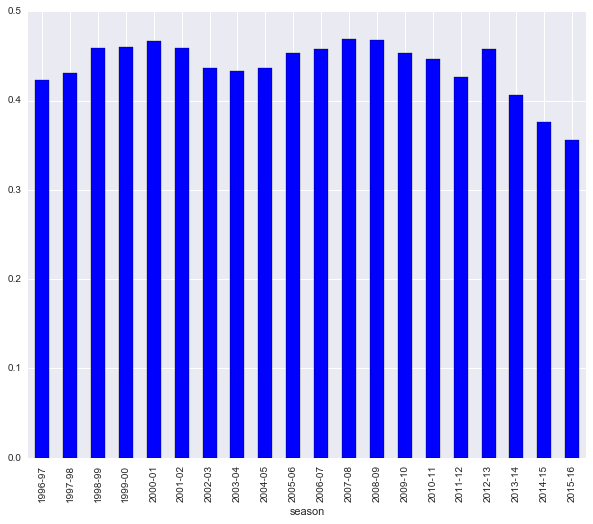

In [406]:
data_complete[["shot_made_flag","season"]].groupby("season")["shot_made_flag"].mean().plot(kind="bar",figsize=(10,8));

In [407]:
#It's clear that Kobe's shooting has fluctuated over the season. Let's see within a season what it looks like. 
#Just for the sample lets look at the year 2000

In [408]:
year_2000 = data_complete[(data_complete['game_date'] > '2000-01-01') & (data_complete['game_date'] < '2000-12-31')]
year_2000.head()

,index,action_type,combined_shot_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,...,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent,shot_id
0,1,Jump Shot,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,...,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,2
1,2,Jump Shot,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,...,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,3
2,3,Jump Shot,Jump Shot,33.8693,138,175,-118.1318,6,1,0,...,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR,4
3,4,Driving Dunk Shot,Dunk,34.0443,0,0,-118.2698,6,2,0,...,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,LAL @ POR,POR,5
4,5,Jump Shot,Jump Shot,34.0553,-145,-11,-118.4148,9,3,0,...,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,LAL @ POR,POR,6


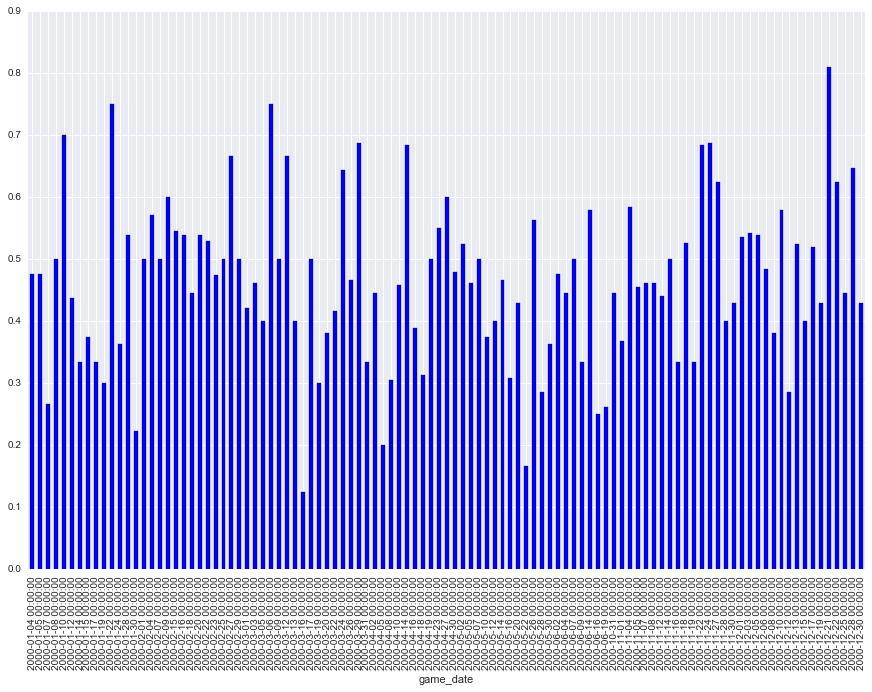

In [409]:
year_2000[["shot_made_flag","game_date"]].groupby("game_date")["shot_made_flag"].mean().plot(kind="bar",figsize=(15,10));

In [410]:
#As we can see from the data, there are some nights where Kobe has a really hot hand and others when does poorly
#This brings up an interesting thought though, does Kobe consistently shoot a certain way on a monthly basis? 

In [411]:
year_2000['day_of_week'] = year_2000["game_date"].dt.weekday

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


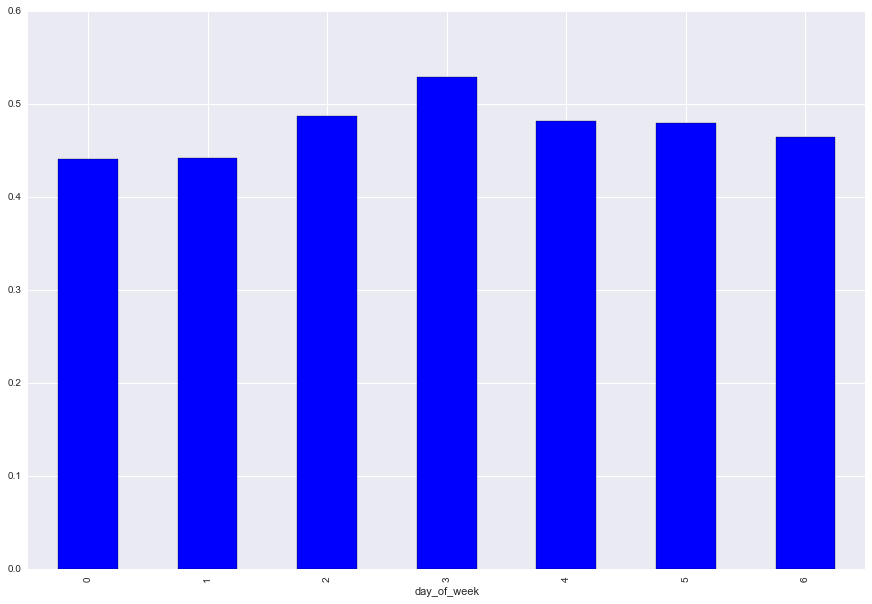

In [412]:
year_2000[["shot_made_flag","day_of_week"]].groupby("day_of_week")["shot_made_flag"].mean().plot(kind="bar",figsize=(15,10));

In [413]:
year_2000['game_month'] = year_2000['game_date'].dt.month

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


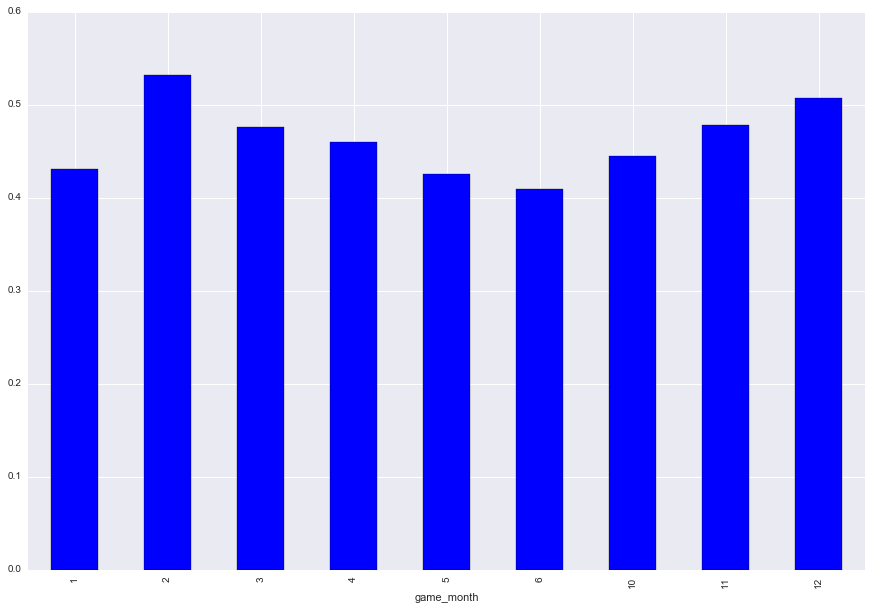

In [414]:
year_2000[["shot_made_flag","game_month"]].groupby("game_month")["shot_made_flag"].mean().plot(kind="bar",figsize=(15,10));

In [415]:
#Does this hold true across the dataset?

In [416]:
data_complete['game_month'] = data_complete['game_date'].dt.month
data_complete['game_year'] = data_complete['game_date'].dt.year
data_complete['game_day'] = data_complete['game_date'].dt.weekday
data_complete.drop(['game_date'],axis=1,inplace=True)

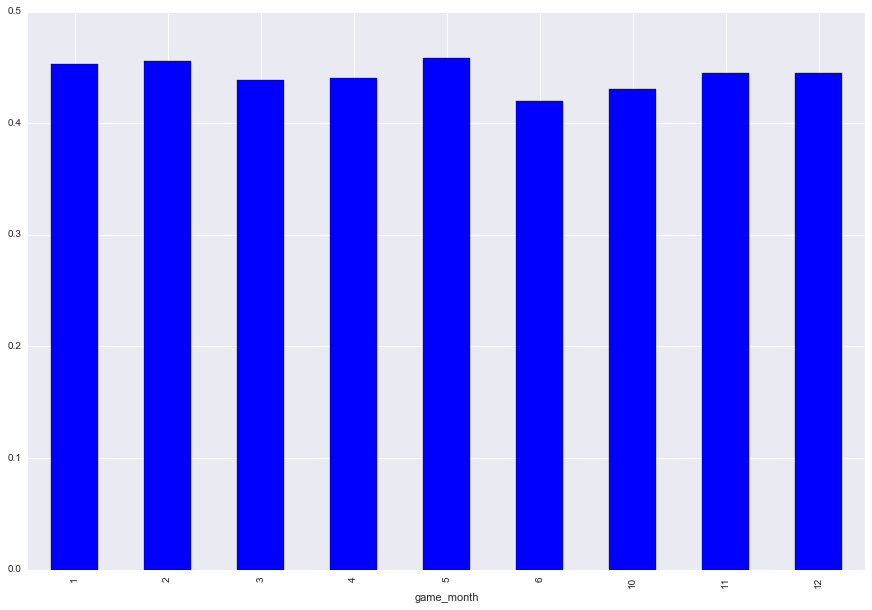

In [417]:
data_complete[["shot_made_flag","game_month"]].groupby("game_month")["shot_made_flag"].mean().plot(kind="bar",figsize=(15,10));

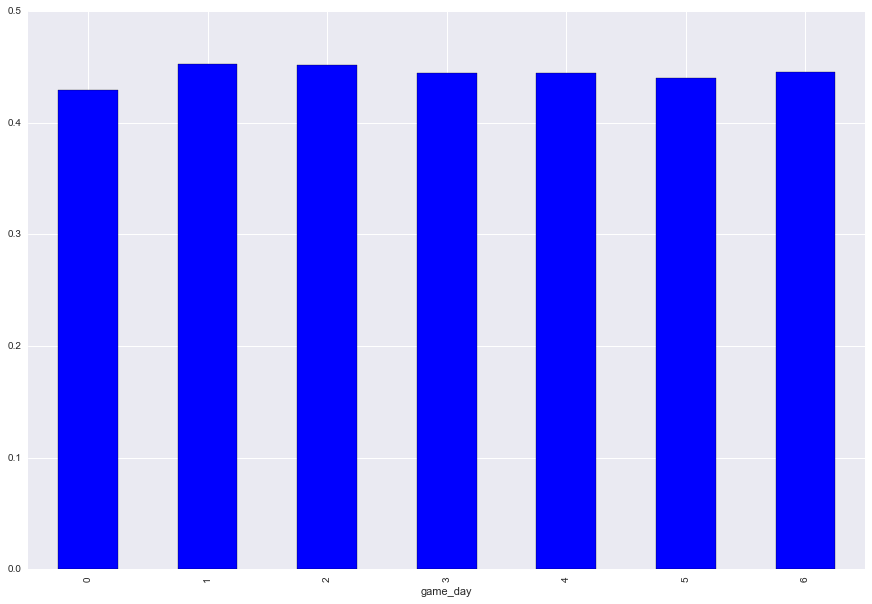

In [418]:
data_complete[["shot_made_flag","game_day"]].groupby("game_day")["shot_made_flag"].mean().plot(kind="bar",figsize=(15,10));

In [419]:
#Unfortunately when we use the whole dataset the time differences seem to start to disappear, but I think they will stll be important

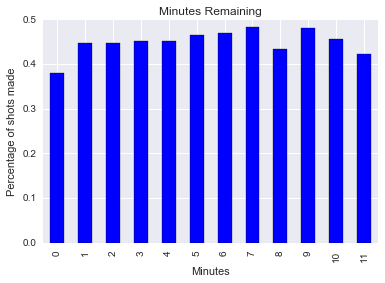

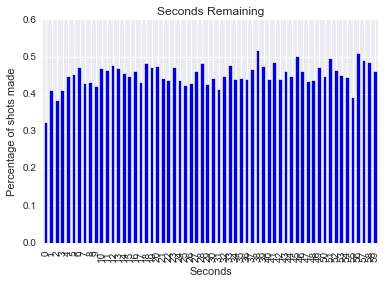

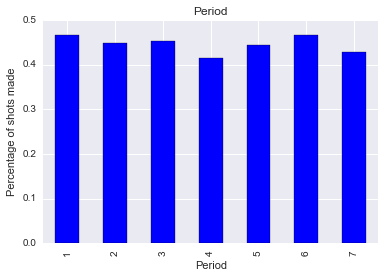

In [420]:
#Let's see how time affects things (period,minutes_remaining,seconds_remaining )
fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.minutes_remaining).mean().plot(kind='bar');
plt.title("Minutes Remaining");
plt.xlabel("Minutes")
plt.ylabel("Percentage of shots made")
plt.show()

fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.seconds_remaining).mean().plot(kind='bar');
plt.title("Seconds Remaining");
plt.xlabel("Seconds")
plt.ylabel("Percentage of shots made")
plt.show()

fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.period).mean().plot(kind='bar');
plt.title("Period");
plt.xlabel("Period")
plt.ylabel("Percentage of shots made")
plt.show()

In [421]:
#Towards the end of his career, it's apparent Kobe was not shooting as well

In [422]:
#Now let's see if the opponenet mattered

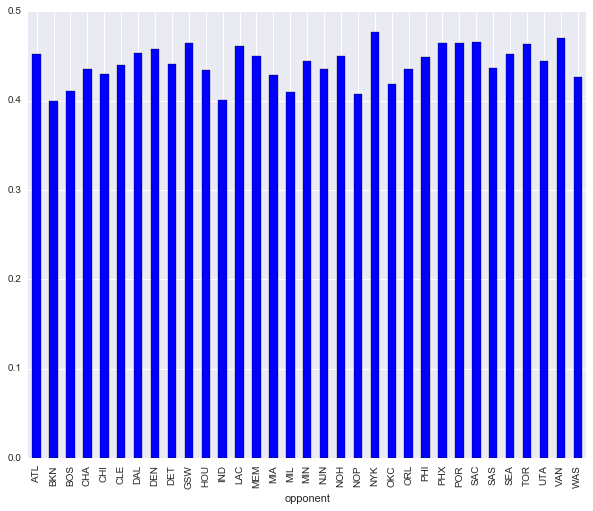

In [423]:
data_complete[["shot_made_flag","opponent"]].groupby("opponent")["shot_made_flag"].mean().plot(kind="bar",figsize=(10,8));

In [424]:
#Let's see home vs away

In [425]:
data_complete['away'] = data_complete.matchup.str.contains('@')
data_complete.drop('matchup', axis=1, inplace=True)

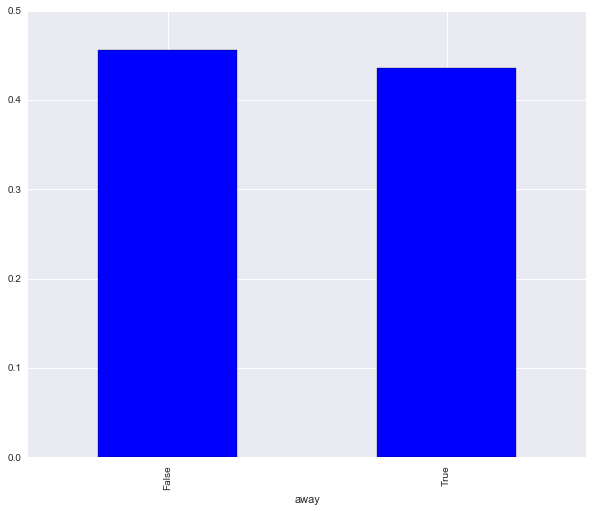

In [426]:
data_complete[["shot_made_flag","away"]].groupby("away")["shot_made_flag"].mean().plot(kind="bar",figsize=(10,8));

In [427]:
#Kobe shot slightly better at home it appears

In [428]:
#Although not drastic, it is still obvious Kobe shot better against some teams

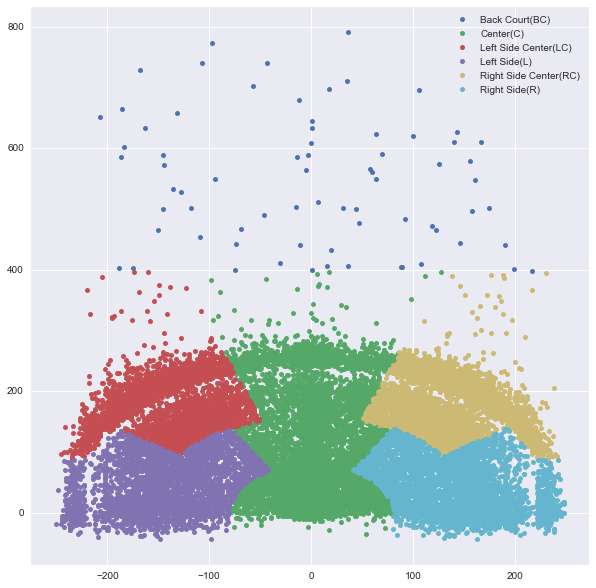

In [429]:
groups = data_complete[["loc_x","loc_y","shot_zone_area"]].groupby('shot_zone_area')

plt.figure(figsize=(10,10))
plt.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    plt.plot(group.loc_x, group.loc_y, marker='o', linestyle='', ms=5, label=name)
plt.legend()

plt.show()

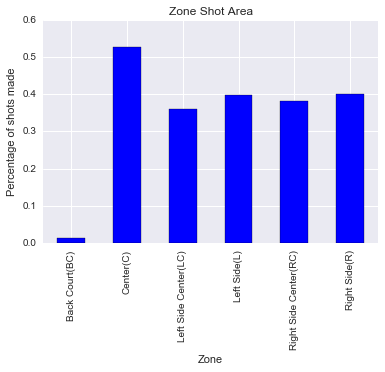

In [430]:
#Let's go through the location data
fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.shot_zone_area).mean().plot(kind='bar');
plt.title("Zone Shot Area");
plt.xlabel("Zone")
plt.ylabel("Percentage of shots made")
plt.show()

(-5, 75)

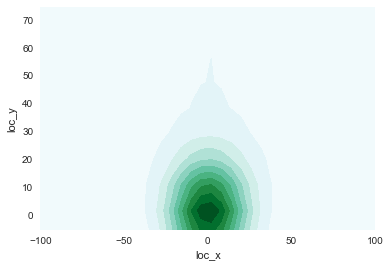

In [444]:
#data_complete['shot_made_flag'].groupby(data_complete.shot_zone_range).mean()
sns.kdeplot(data_complete['loc_x'], data_complete['loc_y'], shade=True)
plt.xlim(-100,100)
plt.ylim(-5,75)
#new_groups = data_complete[["loc_x","loc_y","shot_zone_area","shot_made_flag"]].groupby('shot_zone_area')
#print(list(groups['loc_x']))
#sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
#                 cmap="Reds", shade=True, shade_lowest=False)

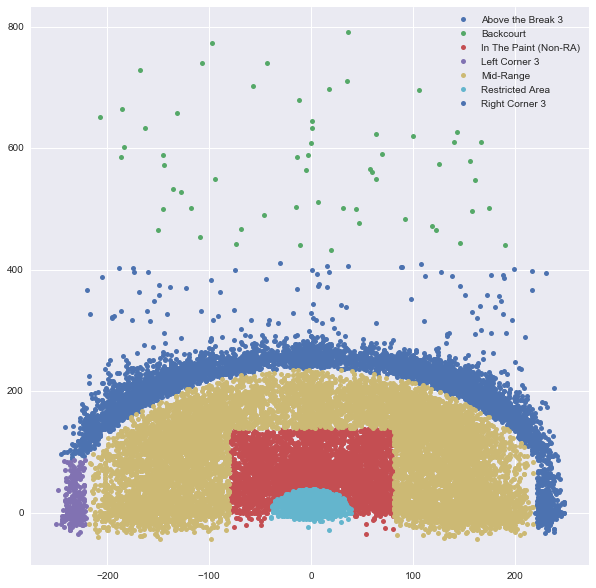

In [345]:
groups = data_complete[["loc_x","loc_y","shot_zone_basic"]].groupby('shot_zone_basic')

plt.figure(figsize=(10,10))
plt.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    plt.plot(group.loc_x, group.loc_y, marker='o', linestyle='', ms=5, label=name)
plt.legend()

plt.show()

In [ ]:
fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.shot_zone_basic).mean().plot(kind='bar');
plt.title("Zone Shot Basic");
plt.xlabel("Zone")
plt.ylabel("Percentage of shots made")
plt.show()

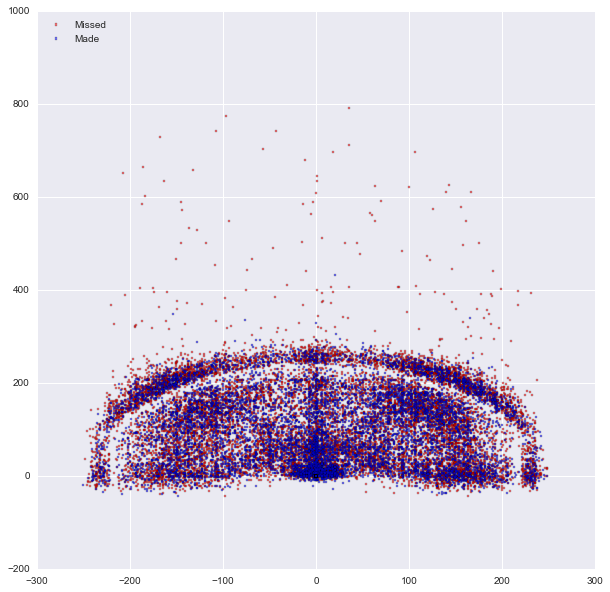

In [446]:
#Let's see what the x,y locations tell us
shots_made = data_complete[data_complete['shot_made_flag'] == 1]
shots_missed = data_complete[data_complete['shot_made_flag'] == 0]

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(shots_missed['loc_x'],shots_missed['loc_y'], s=8, c='r', marker="s", label='Missed',alpha=0.5)
ax1.scatter(shots_made['loc_x'],shots_made['loc_y'], s= 8, c='b', marker="s", label='Made',alpha=0.5)
plt.legend(loc='upper left');
plt.show()

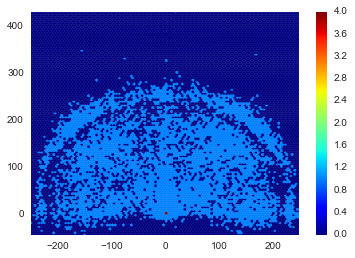

In [460]:
plt.hexbin(shots_made['loc_x'], shots_made['loc_y'], cmap=plt.cm.jet, bins=5)
plt.colorbar()
plt.show()

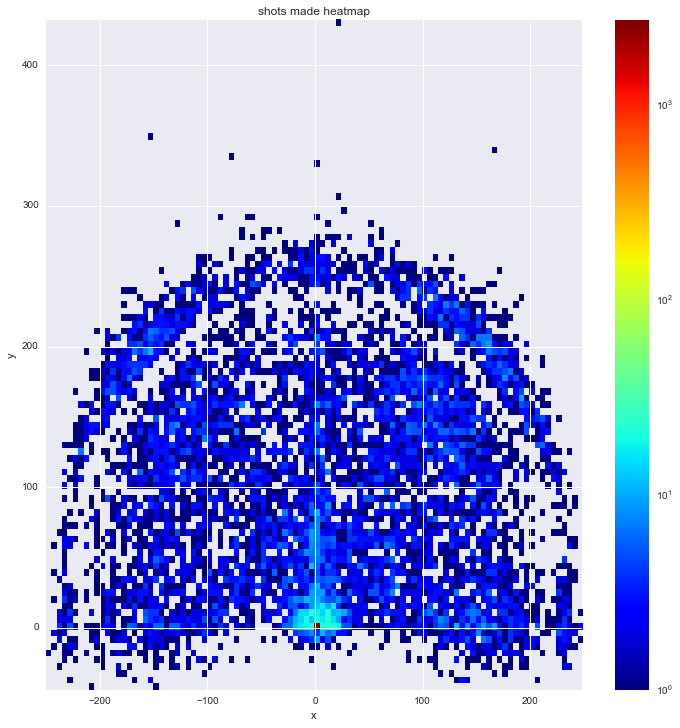

In [455]:
#Let take a look at the spatial distribution of the check in points
bins = 100
plt.figure(figsize=(12,12))
plt.hist2d(shots_made['loc_x'], shots_made['loc_y'], norm=LogNorm(),bins=bins,cmap='jet') #
plt.colorbar()
plt.title('shots made heatmap')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

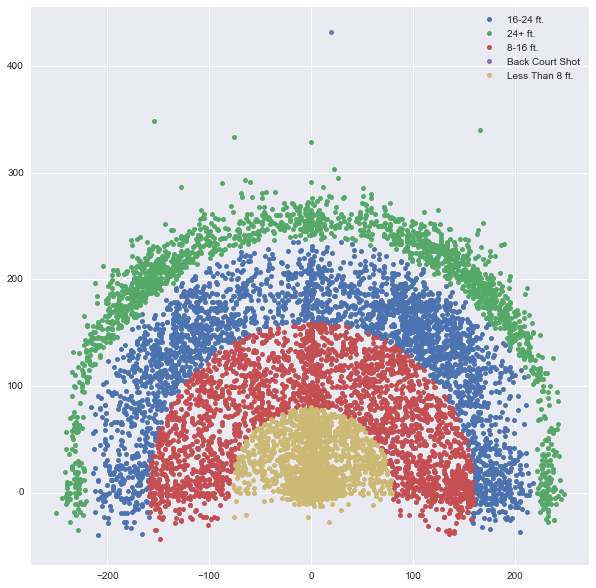

In [347]:
group_made = shots_made[["loc_x","loc_y","shot_zone_range"]].groupby('shot_zone_range')
group_missed = shots_missed[["loc_x","loc_y","shot_zone_range"]].groupby('shot_zone_range')

plt.figure(figsize=(10,10))
plt.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in group_made:
    plt.plot(group.loc_x, group.loc_y, marker='o', linestyle='', ms=5, label=name)
plt.legend()

plt.show()

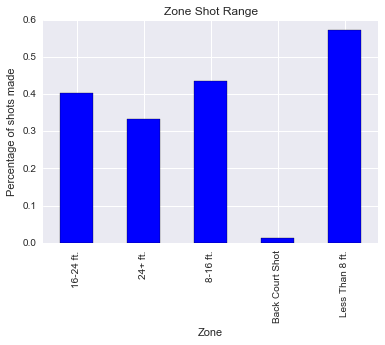

In [461]:
fig = plt.figure()
data_complete['shot_made_flag'].groupby(data_complete.shot_zone_range).mean().plot(kind='bar');
plt.title("Zone Shot Range");
plt.xlabel("Zone")
plt.ylabel("Percentage of shots made")
plt.show()

In [463]:
print(data_complete[['shot_distance','shot_zone_range']])

       shot_distance  shot_zone_range
0                 15         8-16 ft.
1                 16        16-24 ft.
2                 22        16-24 ft.
3                  0  Less Than 8 ft.
4                 14         8-16 ft.
5                  0  Less Than 8 ft.
6                 12         8-16 ft.
7                 12         8-16 ft.
8                 25          24+ ft.
9                 17        16-24 ft.
10                12         8-16 ft.
11                 9         8-16 ft.
12                 5  Less Than 8 ft.
13                20        16-24 ft.
14                25          24+ ft.
15                16        16-24 ft.
16                14         8-16 ft.
17                18        16-24 ft.
18                11         8-16 ft.
19                18        16-24 ft.
20                 7  Less Than 8 ft.
21                 0  Less Than 8 ft.
22                20        16-24 ft.
23                26          24+ ft.
24                19        16-24 ft.
25          

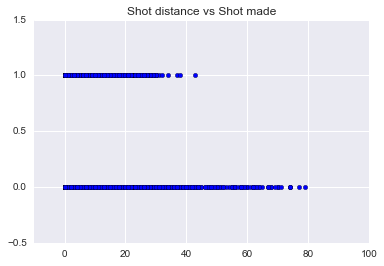

In [349]:
#Let's look at different distance metrics and see how they effect whether a shot was made
plt.figure()
plt.scatter(data_complete['shot_distance'],data_complete['shot_made_flag'])
plt.title("Shot distance vs Shot made")
plt.xlim(-10,100)
plt.ylim(-0.5,1.5)
plt.show()

In [350]:
#There seems to be a cutoff distance wise once the shot is past 45 feet

In [351]:
data_complete['distance'] = data_complete.apply(lambda i: i['shot_distance'] if i['shot_distance'] <45 else 45, axis=1)

One immediate improvement we could make in the data set is to reduce the number of location-based columns

Right now we have lat, lon, loc_x,loc_y, shot_zone_area,shot_zone_basic for the region of the court 

Additionally we have shot_distance, shot_type,shot_zone_range all describing pretty much the same thing

In [352]:
data_complete = data_complete.drop(['lat','lon'],axis=1)

       shot_distance  shot_zone_range
0                 15         8-16 ft.
1                 16        16-24 ft.
2                 22        16-24 ft.
3                  0  Less Than 8 ft.
4                 14         8-16 ft.
5                  0  Less Than 8 ft.
6                 12         8-16 ft.
7                 12         8-16 ft.
8                 25          24+ ft.
9                 17        16-24 ft.
10                12         8-16 ft.
11                 9         8-16 ft.
12                 5  Less Than 8 ft.
13                20        16-24 ft.
14                25          24+ ft.
15                16        16-24 ft.
16                14         8-16 ft.
17                18        16-24 ft.
18                11         8-16 ft.
19                18        16-24 ft.
20                 7  Less Than 8 ft.
21                 0  Less Than 8 ft.
22                20        16-24 ft.
23                26          24+ ft.
24                19        16-24 ft.
25          

In [354]:
data_complete.columns.tolist()

['index',
 'action_type',
 'combined_shot_type',
 'loc_x',
 'loc_y',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'opponent',
 'shot_id',
 'game_month',
 'game_year',
 'game_day',
 'away',
 'distance']

In [355]:
categories = data_complete.dtypes == 'object'
categories = list(data_complete.columns[categories.values])
print(categories)

['action_type', 'combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent']


In [8]:
len(data_complete.columns)

NameError: name 'data_complete' is not defined

In [357]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_complete[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_complete.drop(cc, axis=1, inplace=True)
    data_complete = data_complete.join(dummies)

In [358]:
data_complete.head()

,index,minutes_remaining,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_id,game_day,away,distance,...,loc_y#664,loc_y#679,loc_y#696,loc_y#697,loc_y#702,loc_y#711,loc_y#728,loc_y#741,loc_y#773,loc_y#791
0,1,10,0,22,15,0,2,1,True,15,...,0,0,0,0,0,0,0,0,0,0
1,2,7,0,45,16,1,3,1,True,16,...,0,0,0,0,0,0,0,0,0,0
2,3,6,0,52,22,0,4,1,True,22,...,0,0,0,0,0,0,0,0,0,0
3,4,6,0,19,0,1,5,1,True,0,...,0,0,0,0,0,0,0,0,0,0
4,5,9,0,32,14,0,6,1,True,14,...,0,0,0,0,0,0,0,0,0,0


In [359]:
#Preliminary Machine Learning

In [360]:
# Separate dataset for training
X = data_complete.copy()
X.drop(["shot_made_flag"],axis=1,inplace=True)
Y = data_complete['shot_made_flag'].copy()

In [361]:
X.isnull().values.any()

False

In [362]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['index', 'shot_id', 'seconds_remaining', 'minutes_remaining',
       'distance', 'shot_distance', 'game_day', 'action_type#Jump Shot',
       'away', 'action_type#Layup Shot', 'combined_shot_type#Dunk', 'period#3',
       'action_type#Running Jump Shot', 'action_type#Driving Layup Shot',
       'period#2', 'period#1', 'period#4', 'game_month#3', 'game_month#12',
       'game_month#1'],
      dtype='object')

In [363]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = X.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['index', 'minutes_remaining', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_id', 'game_day', 'away', 'distance',
       'action_type#Jump Shot', 'combined_shot_type#Jump Shot',
       'combined_shot_type#Layup', 'period#1', 'period#2', 'period#3',
       'period#4', 'shot_type#2PT Field Goal', 'shot_type#3PT Field Goal',
       'shot_zone_area#Center(C)', 'shot_zone_area#Left Side Center(LC)',
       'shot_zone_area#Left Side(L)', 'shot_zone_area#Right Side Center(RC)',
       'shot_zone_area#Right Side(R)', 'shot_zone_basic#Above the Break 3',
       'shot_zone_basic#In The Paint (Non-RA)', 'shot_zone_basic#Mid-Range',
       'shot_zone_basic#Restricted Area', 'shot_zone_range#16-24 ft.',
       'shot_zone_range#24+ ft.', 'shot_zone_range#8-16 ft.',
       'shot_zone_range#Less Than 8 ft.', 'game_month#1', 'game_month#2',
       'game_month#3', 'game_month#4', 'game_month#11', 'game_month#12',
       'loc_x#0', 'loc_y#0'],
      dtype='object')

In [364]:
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, Y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['combined_shot_type#Dunk', 'action_type#Jump Shot',
       'shot_zone_basic#Restricted Area', 'action_type#Driving Layup Shot',
       'loc_x#0', 'loc_y#0', 'shot_zone_range#Less Than 8 ft.',
       'action_type#Slam Dunk Shot', 'shot_type#3PT Field Goal',
       'action_type#Driving Dunk Shot', 'shot_zone_area#Center(C)',
       'action_type#Running Jump Shot', 'shot_zone_range#24+ ft.',
       'shot_zone_basic#Above the Break 3', 'combined_shot_type#Layup',
       'combined_shot_type#Jump Shot', 'distance',
       'action_type#Jump Bank Shot', 'action_type#Pullup Jump shot',
       'shot_zone_area#Left Side Center(LC)'], dtype=object)

In [365]:
rfe = RFE(LogisticRegression(), 20)
rfe.fit(X, Y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_20

array(['shot_distance', 'distance', 'action_type#Driving Dunk Shot',
       'action_type#Driving Layup Shot', 'action_type#Jump Bank Shot',
       'action_type#Jump Shot', 'action_type#Layup Shot',
       'action_type#Pullup Jump shot', 'action_type#Running Jump Shot',
       'action_type#Slam Dunk Shot', 'combined_shot_type#Dunk',
       'combined_shot_type#Layup', 'period#4', 'season#2015-16',
       'shot_zone_area#Left Side(L)', 'shot_zone_basic#Restricted Area',
       'shot_zone_range#16-24 ft.', 'game_year#2006', 'game_year#2008',
       'loc_x#0'], dtype=object)

In [366]:
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
        feat_scored_20,
        feat_rfe_20
    ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-action_type#Driving Dunk Shot
	-action_type#Driving Layup Shot
	-action_type#Jump Bank Shot
	-action_type#Jump Shot
	-action_type#Layup Shot
	-action_type#Pullup Jump shot
	-action_type#Running Jump Shot
	-action_type#Slam Dunk Shot
	-away
	-combined_shot_type#Dunk
	-combined_shot_type#Jump Shot
	-combined_shot_type#Layup
	-distance
	-game_day
	-game_month#1
	-game_month#11
	-game_month#12
	-game_month#2
	-game_month#3
	-game_month#4
	-game_year#2006
	-game_year#2008
	-index
	-loc_x#0
	-loc_y#0
	-minutes_remaining
	-period#1
	-period#2
	-period#3
	-period#4
	-playoffs
	-season#2015-16
	-seconds_remaining
	-shot_distance
	-shot_id
	-shot_type#2PT Field Goal
	-shot_type#3PT Field Goal
	-shot_zone_area#Center(C)
	-shot_zone_area#Left Side Center(LC)
	-shot_zone_area#Left Side(L)
	-shot_zone_area#Right Side Center(RC)
	-shot_zone_area#Right Side(R)
	-shot_zone_basic#Above the Break 3
	-shot_zone_basic#In The Paint (Non-RA)
	-shot_zone_basic#Mid-Range
	-shot_zone_basi

In [367]:
Y.values

array([ 0.,  1.,  0., ...,  1.,  0.,  0.])

In [368]:
#Remember, features it the set of all the most important predictors in the data

In [369]:
#Try Linear Regression

In [370]:
# Initialize our algorithm class
alg = LinearRegression()
kf = KFold(X.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (X[features].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = Y.iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(X[features].iloc[test,:])
    predictions.append(test_predictions)

In [371]:
# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

num_correct = (Y == predictions)
num_correct = num_correct[num_correct == True]
accuracy = len(num_correct)/len(predictions)
print(accuracy)

0.6430711756236136


In [372]:
#Logistic Regression

In [373]:
# Initialize our algorithm
alg_log = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg_log, X[features], Y, cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.668132736904


In [374]:
alg_RF1 = RandomForestClassifier()#random_state=1, max_features=n_features,max_depth=None)


scores = cross_validation.cross_val_score(alg_RF1,X[features],Y)

print(scores.mean())

0.567226403667


In [375]:
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg_RF = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)


scores = cross_validation.cross_val_score(alg_RF,X[features],Y,cv=3)

print(scores.mean())

0.555279453468


In [376]:
n_features = len(data_complete.columns)
n_features

1113

In [377]:
alg_RF1 = RandomForestClassifier(n_estimators=2000,max_depth=None,random_state=1)

scores = cross_validation.cross_val_score(alg_RF1,X[features],Y)

print(scores.mean())

0.558315086225


In [378]:
alg_GB = GradientBoostingClassifier(random_state=1, n_estimators=2000, max_depth=None,learning_rate=0.03)
scores = cross_validation.cross_val_score(alg_GB,X[features],Y)

print(scores.mean())

0.521112707179


In [379]:
#Trying XGBoost

In [380]:
print("-" * 10 + "XGBClassifier" + "-" * 10)
clf_xgb = XGBClassifier(max_depth=7, learning_rate=0.012, n_estimators=1000, subsample=0.62, colsample_bytree=0.6, seed=1)
clf_xgb.fit(X, Y)

----------XGBClassifier----------


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.012, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1, silent=True, subsample=0.62)

In [381]:
label_xg = "XGBoost"
score = cross_validation.cross_val_score(clf_xgb, X[features], Y.values, cv=3, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (score.mean(), score.std(), label_xg))

Accuracy: 0.50 (+/- 0.04) [XGBoost]


In [382]:
#Try Ensembling methods

In [383]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import operator

class EnsembleClassifier(BaseEstimator, ClassifierMixin):
    """
    Ensemble classifier for scikit-learn estimators.

    Parameters
    ----------

    clf : `iterable`
      A list of scikit-learn classifier objects.
    weights : `list` (default: `None`)
      If `None`, the majority rule voting will be applied to the predicted class labels.
        If a list of weights (`float` or `int`) is provided, the averaged raw probabilities (via `predict_proba`)
        will be used to determine the most confident class label.

    """
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights

    def fit(self, X, y):
        """
        Fit the scikit-learn estimators.

        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]
            Training data
        y : list or numpy array, shape = [n_samples]
            Class labels

        """
        for clf in self.clfs:
            clf.fit(X, y)

    def predict(self, X):
        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        maj : list or numpy array, shape = [n_samples]
            Predicted class labels by majority rule

        """

        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)

            maj = np.apply_along_axis(lambda x: max(enumerate(x), key=operator.itemgetter(1))[0], axis=1, arr=avg)

        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])

        return maj

    def predict_proba(self, X):

        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        avg : list or numpy array, shape = [n_samples, n_probabilities]
            Weighted average probability for each class per sample.

        """
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis=0, weights=self.weights)

        return avg

In [384]:
np.random.seed(123)
eclf = EnsembleClassifier(clfs=[alg_log, alg_RF1, clf_xgb], weights=[1,1,1])

for clf, label in zip([alg_log, alg_RF1, clf_xgb,eclf], ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ensemble']):

    scores = cross_validation.cross_val_score(clf, X[features], Y.values, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.65 (+/- 0.01) [Logistic Regression]
Accuracy: 0.56 (+/- 0.08) [Random Forest]
Accuracy: 0.50 (+/- 0.04) [XGBoost]
Accuracy: 0.54 (+/- 0.07) [Ensemble]


In [385]:
#Prepare submit data

In [386]:
data_submit['game_month'] = data_submit['game_date'].dt.month
data_submit['game_year'] = data_submit['game_date'].dt.year
data_submit['game_day'] = data_submit['game_date'].dt.weekday

In [387]:
data_submit['away'] = data_submit.matchup.str.contains('@')
data_submit.drop('matchup', axis=1, inplace=True)

In [388]:
data_submit['distance'] = data_submit.apply(lambda i: i['shot_distance'] if i['shot_distance'] <45 else 45, axis=1)

In [389]:
data_submit.drop(['lon','lat'],axis=1,inplace=True)
data_submit.drop(["game_date"],axis=1,inplace=True)

In [390]:
data_submit.drop(['shot_made_flag'],axis=1,inplace=True)

In [391]:
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'loc_x', 'loc_y']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_submit[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_submit.drop(cc, axis=1, inplace=True)
    data_submit = data_submit.join(dummies)

In [392]:
data_submit.head()

,index,minutes_remaining,playoffs,seconds_remaining,shot_distance,shot_id,game_day,away,distance,action_type#Alley Oop Dunk Shot,...,loc_y#485,loc_y#493,loc_y#496,loc_y#503,loc_y#527,loc_y#528,loc_y#548,loc_y#564,loc_y#587,loc_y#592
0,0,10,0,27,18,1,1,True,18,0,...,0,0,0,0,0,0,0,0,0,0
1,7,8,0,5,2,8,1,True,2,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,1,0,17,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,10,0,46,0,20,2,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32,11,0,26,17,33,5,True,17,0,...,0,0,0,0,0,0,0,0,0,0


In [393]:
def makeSubmission(alg,name):
    alg.fit(X[features],Y)
    target_y = alg_log.predict_proba(data_submit[features]).astype(float)[:,1]
    target_id = data_submit["shot_id"]
    submission = pd.DataFrame({"shot_id":target_id, "shot_made_flag":target_y})
    submission.sort_values('shot_id',  inplace=True)
    submission.to_csv("KobeSubmission{}.csv".format(name),index=False)

In [394]:
makeSubmission(alg_log,"Log")
makeSubmission(alg_RF1,"RandomForest")
makeSubmission(clf_xgb,"XGBoost")
makeSubmission(eclf,"Ensemble")